C:\Users\svbqb\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning:

fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.08018677, -0.        ]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 7, 'warnflag': 2}

C:\Users\svbqb\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning:

fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.09115971, -0.        ]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 70, 'nit': 10, 'warnflag': 2}

C:\Users\svbqb\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning:

fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00453731, -0.        ]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 103, 'nit': 10, 'warnflag': 2}

C:\Users\svbqb\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning:

fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 7.730

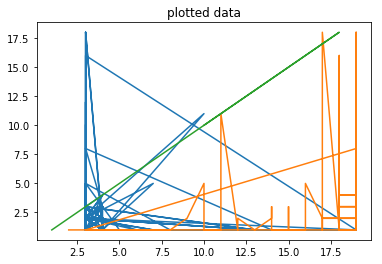

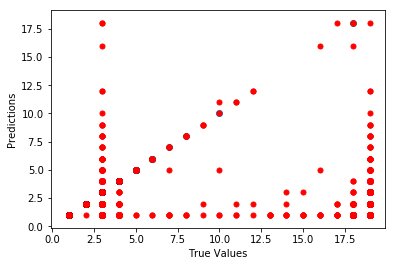

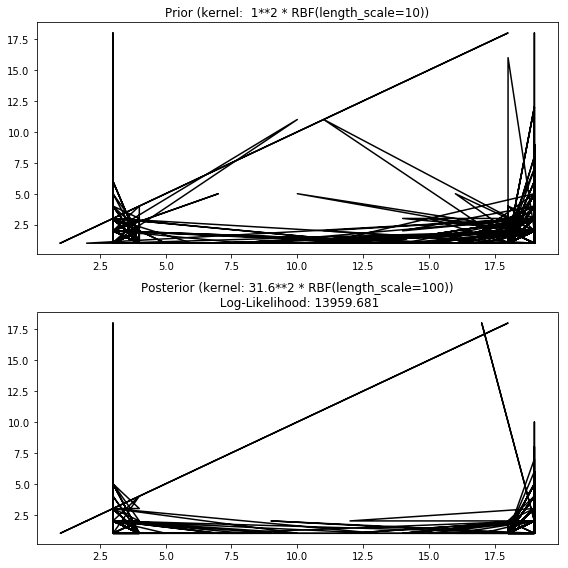

[[ 1.9999999 ]
 [17.99990304]
 [ 1.9999999 ]
 [ 1.9999999 ]
 [ 3.00000046]
 [ 4.0000004 ]
 [ 1.9999999 ]
 [ 2.00000055]
 [ 1.00000083]
 [ 3.00000046]
 [ 1.00000037]
 [ 3.00000046]
 [ 1.9999999 ]
 [ 1.00000037]
 [ 1.00000083]
 [ 6.99999665]
 [ 1.9999999 ]
 [ 3.00000046]
 [ 0.99999723]
 [ 1.00000083]
 [ 1.9999999 ]
 [ 2.00000055]
 [ 1.00000083]
 [ 1.9999999 ]
 [ 0.99999751]
 [ 0.99999751]
 [ 3.00000046]
 [ 3.00000046]
 [ 3.00000046]
 [ 9.99999815]
 [ 1.9999999 ]
 [ 0.99999751]
 [ 3.00000046]
 [ 1.9999999 ]
 [ 1.9999999 ]
 [ 1.00000083]
 [ 4.0000004 ]
 [ 1.00000083]
 [ 1.00000083]
 [ 1.00000083]
 [ 5.00000003]
 [ 1.9999999 ]
 [ 3.00000046]
 [ 1.00000083]
 [ 1.00000083]
 [ 1.9999999 ]
 [ 1.9999999 ]
 [ 0.99999751]
 [ 0.99999751]
 [ 1.9999999 ]
 [ 4.0000004 ]
 [ 3.00000046]
 [ 0.99999723]
 [ 2.00000055]
 [ 1.9999999 ]
 [ 1.9999999 ]
 [ 1.9999999 ]
 [ 1.9999999 ]
 [ 1.9999999 ]
 [ 1.00000083]
 [ 1.00000083]
 [ 1.00000083]
 [ 1.9999999 ]
 [ 1.00000083]
 [ 1.9999999 ]
 [ 1.9999999 ]
 [ 1.99999

In [5]:
import plotly.plotly as py
import plotly.graph_objs as go
import itertools
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
###################################################################################################33
#first the datasets: bot_compiled and non_bot_compiled are to be merged into a single matrix
is_bot=pd.read_excel('C:/Users/svbqb/Documents/Asst_NLP/bot_nonbot_scoring/SAI/bot.xlsx').as_matrix()
non_bot=pd.read_excel('C:/Users/svbqb/Documents/Asst_NLP/bot_nonbot_scoring/SAI/nonbot.xlsx').as_matrix()
X = np.concatenate((is_bot,non_bot))
y=X[:,[2]]
class_names = ['is_bot','non_bot']

##########################################################################################################
# Split our data
x_train, x_test, y_train_labels, y_test_labels = train_test_split(X,y,test_size=0.33)
################################################################################################################
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(x_train, y_train_labels)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred = gp.predict(x_test)
#print(y_pred)

plt.plot(X, y)
#pl.axis([-5, 5, -3, 3])
plt.title('plotted data')
plt.show()
fig = plt.figure()
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')

plt.scatter(y_test_labels, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

# Plot prior
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
y_mean = gp.predict(x_train)
plt.plot(x_train, y_mean, 'k')
plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)
# Plot posterior
plt.subplot(2, 1, 2)
plt.plot(x_test, y_pred, 'k')
plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f" %(gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()
plt.show()
print(y_pred)